# Criando um modelo de Regressão Linear
- Tenho os dados de preço, desconto e venda e vou fazer uma campanha de natal nas lojas com o preço de 17.50 e desconto de até 40 centavos e preciso saber quanto de estoque eu devo mandar para a loja

In [29]:
import pandas as pd

In [30]:
dados = pd.read_excel("./dadosVenda.xlsx")
dados.head(3)

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
0,1,21.85,23,1.15,81
1,2,4.30,5,0.70,3361
2,3,13.65,15,1.35,1551


In [31]:
# Verificando as informações da base
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IDRegistro     1634 non-null   int64  
 1   PrecoVenda     1634 non-null   float64
 2   PrecoOriginal  1634 non-null   int64  
 3   Desconto       1606 non-null   float64
 4   VendaQtd       1634 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 64.0 KB


In [32]:
dados[dados.Desconto.isnull()]

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
18,19,22.0,22,NaN,228
23,24,9.0,9,NaN,2607
45,46,19.0,19,NaN,777
46,47,13.0,13,NaN,1875
64,65,23.0,23,NaN,45
177,178,5.0,5,NaN,3339
327,328,21.0,21,NaN,411
440,441,13.0,13,NaN,1875
452,453,18.0,18,NaN,960
515,516,15.0,15,NaN,1509


**Tratando valores vazios**

In [33]:
# Ajustando os dados com valores de desconto vazio
#dados[dados.Desconto.isnull()] = 0
dados.loc[dados.Desconto.isnull(),"Desconto"] = 0

In [34]:
# Verificando novamente as informações da base
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IDRegistro     1634 non-null   int64  
 1   PrecoVenda     1634 non-null   float64
 2   PrecoOriginal  1634 non-null   int64  
 3   Desconto       1634 non-null   float64
 4   VendaQtd       1634 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 64.0 KB


**Entendendo a base**

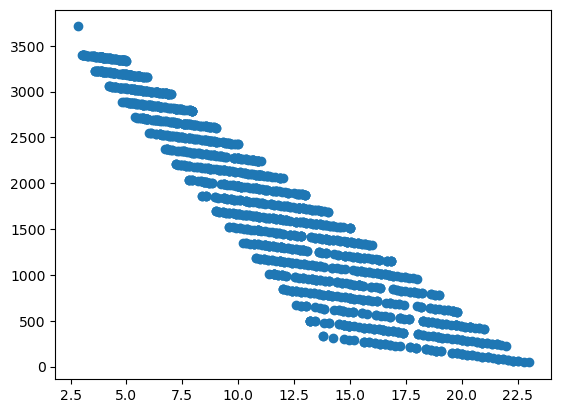

In [35]:
# Podemos fazer o scatter plot
import matplotlib.pyplot as plt

# plot
fig, ax = plt.subplots()

ax.scatter(dados.PrecoVenda, dados.VendaQtd)

plt.show()

### Definição do modelo
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [36]:
# Importando o LinearRegression
from sklearn.linear_model import LinearRegression

In [37]:
# Criando os dados
X = dados.PrecoVenda
y = dados.VendaQtd

In [38]:
# Fazendo o fit do modelo
# Passsando X e Y, e tratando o x
reg = LinearRegression().fit(X.values.reshape(-1, 1), y)

In [39]:
# Qual o score? o resultado do modelo
# Passsando X e Y, e tratando o x

reg.score(X.values.reshape(-1, 1), y)

0.8956436940447059

### Ele ainda da o coeficiente ANGULAR e o coeficiente LINEAR
##### Que podemos usar para traçar os pontos
reg.coef_ <br>
reg.intercept_

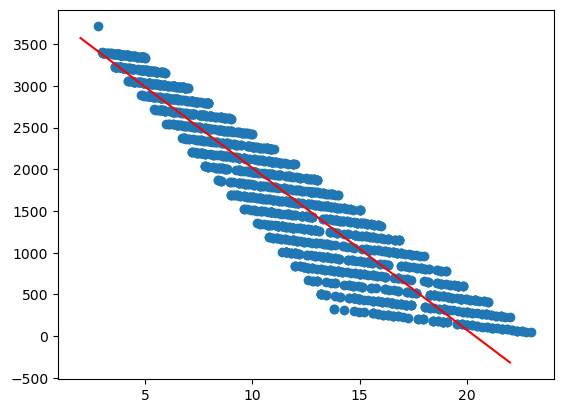

In [40]:
# Podemos fazer o scatter plot
import matplotlib.pyplot as plt
import numpy as np

# plot
fig, ax = plt.subplots()

# Mostrando o grafico com os pontos
ax.scatter(dados.PrecoVenda, dados.VendaQtd)

# Definindo o X e Y
x_plot = np.arange(2,23)  # Pegando do grafico

#Equação da reta = Coeficiente linear + x* coeficiente angular
y_plot = reg.coef_[0]*x_plot + reg.intercept_ 


# Traçando a reta
# c='r' = cor vermelha
ax.plot(x_plot,y_plot,c='r')

plt.show()

### Realizando previsao

In [41]:
# Podemos definir uma lista de valores para fazermos a previsão
valores = {
    'valores': [17.50, 17.40, 17.30, 17.20, 17.10]
}

valores = pd.DataFrame(valores)

In [42]:
# Fazendo o predict
reg.predict(valores)

C:\Users\leand\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([559.94606196, 579.3805924 , 598.81512285, 618.2496533 ,
       637.68418374])

##### Se eu vender a 17.50, terei 685... Se vender a 17,10 terei 751, etc..

### Verificando esse modelo

In [43]:
# Verificando os dados para esse mesmo preço de venda
dados[dados.PrecoVenda == 17.10]

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
397,398,17.1,19,1.9,836
492,493,17.1,19,1.9,836
1414,1415,17.1,18,0.9,988


In [44]:
# Verificando os dados para um range de preços e descontos
dados[(dados.PrecoOriginal >= 17) & (dados.PrecoOriginal <= 18) & (dados.Desconto >= 0) & (dados.Desconto <= 0.4)]

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
108,109,16.83,17,0.17,1148
284,285,16.66,17,0.34,1154
452,453,18.00,18,0.00,960
989,990,16.83,17,0.17,1148
998,999,16.83,17,0.17,1148
1115,1116,17.82,18,0.18,966
1220,1221,17.64,18,0.36,971
1539,1540,16.66,17,0.34,1154
1548,1549,16.66,17,0.34,1154
1576,1577,16.83,17,0.17,1148


#### Notamos que o valor estimado esta muito errado, isso acontece porque usamos preço de venda ao inves do preço original do desconto

### Escolhendo novas entradas pro modelo
- Podemos, ao invés de usar PrecoVenda, usar PrecoOriginal e Desconto

In [45]:
# Dados
# X é o que vai usar pra ter a previsao e Y o que quer que preveja
X2 = dados[["PrecoOriginal","Desconto"]]
y2 = dados.VendaQtd

In [46]:
# Fazendo o fit
reg2 = LinearRegression().fit(X2, y2)

In [47]:
# Resultado
# Acertando 99.99%
reg2.score(X2, y2)

0.9999999083594651

In [48]:
# Resultado anterior
reg.score(X.values.reshape(-1, 1),y)

0.8956436940447059

In [49]:
# Coeficiente angular
reg2.coef_

array([-182.99974391,   31.00137454])

In [50]:
# Coeficiente linear 
reg2.intercept_

4254.00024394365

### Fazendo predição

In [64]:
# Criando valores para predição

valores = {
    'valores': [17.50, 17.40, 17.30, 17.20, 17.10],
    'PrecoOriginal': [17.50,17.50,17.50,17.50,17.50],
    'Desconto': [0,0.1,0.2,0.3,0.4]
}

valores = pd.DataFrame(valores)

In [65]:
# Fazendo a predição
reg2.predict(valores[["PrecoOriginal","Desconto"]])

array([1051.50472554, 1054.604863  , 1057.70500045, 1060.8051379 ,
       1063.90527536])

### Analisando erros


In [68]:
# Verificando novamente os dados para comparar com os modelos
dados[(dados.PrecoOriginal >= 17) & (dados.PrecoOriginal <= 18) & (dados.Desconto >= 0) & (dados.Desconto <= 0.4)]

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd,y_model1,y_model2
108,109,16.83,17,0.17,1148,690.157416,1148.274831
284,285,16.66,17,0.34,1154,723.196118,1153.545065
452,453,18.00,18,0.00,960,462.773410,960.004854
989,990,16.83,17,0.17,1148,690.157416,1148.274831
998,999,16.83,17,0.17,1148,690.157416,1148.274831
1115,1116,17.82,18,0.18,966,497.755565,965.585101
1220,1221,17.64,18,0.36,971,532.737719,971.165348
1539,1540,16.66,17,0.34,1154,723.196118,1153.545065
1548,1549,16.66,17,0.34,1154,723.196118,1153.545065
1576,1577,16.83,17,0.17,1148,690.157416,1148.274831


### Adicionando coluna com a predicao 1 e predicao 2

In [70]:
# Notamos que a predição 1 errou e a predicao 2 acertou mais

dados['y_model1'] = reg.predict(dados.PrecoVenda.values.reshape(-1, 1))
dados['y_model2'] = reg2.predict(dados[["PrecoOriginal","Desconto"]])
dados.head()

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd,y_model1,y_model2
0,1,21.85,23,1.15,81,-285.456012,80.657715
1,2,4.30,5,0.70,3361,3125.304081,3360.702487
2,3,13.65,15,1.35,1551,1308.175484,1550.855941
3,4,4.97,7,2.03,3036,2995.092727,3035.934827
4,5,9.60,10,0.40,2436,2095.273967,2436.403355


### Mas acima so temos as 5 primeiros linhas, queremos ver os erros em todos os itens
##### Vamos usar o erro medio absoluto


In [72]:
from sklearn.metrics import mean_absolute_error

##### Vamos passar como paremetro os dados verdadeiros e os dados que foram previstos

In [73]:
# para o modelo 1
mean_absolute_error(dados.VendaQtd, dados.y_model1)

254.3109951899015

In [74]:
# para o modelo 2
mean_absolute_error(dados.VendaQtd, dados.y_model2)

0.24931777290881982

#### Notamos que o erro 2 é minimo, enquanto o 1 é grande

### Fazendo o erro medio absoluto por Porcentagem

In [77]:
from sklearn.metrics import mean_absolute_percentage_error

In [78]:
# para o modelo 1
mean_absolute_percentage_error(dados.VendaQtd, dados.y_model1)*100

33.713612693046215

In [79]:
# para o modelo 2
mean_absolute_percentage_error(dados.VendaQtd, dados.y_model2)*100

0.027306697265631803